In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data

df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# checking for missing values

df.isnull().sum()



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# find percentage of missing values

df.isnull().sum() / len(df) * 100



survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# imputing missing values

df['age'] = df['age'].fillna(df['age'].mean())

In [9]:
df['embark_town'] =df['embark_town'].fillna(df['embark_town'].mode()[0])

# [0]is used to get the first value of the mode

In [10]:
# to remove the missing values from embarked

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [11]:
# if the missing values are more than 50% then we can drop the column
df.drop('deck',axis = 1)
# or 
df.drop('deck',axis = 1, inplace = True)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### **Assignment:** 
If you do not impute missing values then what wiil happen?


In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
df.age.min()

0.42

In [15]:
df.age.max()

80.0

<Axes: xlabel='age', ylabel='Count'>

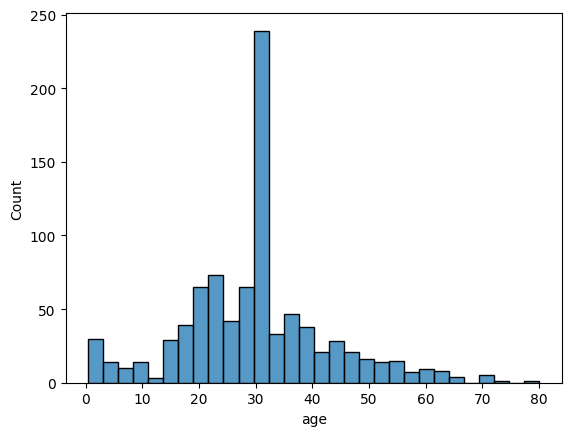

In [16]:
sns.histplot(df['age'])

## Binning:

In [17]:
# binninng the age column into 7 categories

bins = [0,1,5,12,18,30,50,80]
labels = ['infant','Toddlers','kids','teenager','young adult','adult','senior']
# kids colum ko bins main convert karna hai
pd.cut(df['age'], bins=bins, labels = labels)

0      young adult
1            adult
2      young adult
3            adult
4            adult
          ...     
886    young adult
887    young adult
888    young adult
889    young adult
890          adult
Name: age, Length: 891, dtype: category
Categories (7, object): ['infant' < 'Toddlers' < 'kids' < 'teenager' < 'young adult' < 'adult' < 'senior']

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


Feature Engineering using binning method:

In [19]:
# binninng the age column into 7 categories

bins = [0,1,5,12,18,30,50,80]
labels = ['infant','Toddlers','kids','teenager','young','adult','old']
# kids colum ko bins main convert karna hai
df['binned_agepd']=pd.cut(df['age'], bins=bins, labels = labels)


In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_agepd
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


In [21]:
df['binned_agepd'].value_counts()

binned_agepd
young       447
adult       241
teenager     70
old          64
Toddlers     30
kids         25
infant       14
Name: count, dtype: int64

In [22]:
# renaming the columns & this is also feature engineering

df.rename(columns = {'binned_agepd':'age_group'}, inplace = True)

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


In [24]:
# ab mei chahta hn ke aik naya dataframe banaon jis main sirf woh columns hon jo mujhe chahiye
# is ke liye mei ne aik list bana di hai jis main woh columns hain jo mei chahata hn
# phir mei ne us list ko use kar ke dataframe ko filter kar diya
# is ko filter karna kehte hain feature selection

df1 = df[['survived','age_group','fare','class']]

In [25]:
df1.head()

,survived,age_group,fare,class
0,0,young,7.2500,Third
1,1,adult,71.2833,First
2,1,young,7.9250,Third
3,1,adult,53.1000,First
4,0,adult,8.0500,Third


In [26]:
# ab agr ham chahtei hai ke sirf us data ko analyze karei jo ke first class ka hai

df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [27]:
# filter data based on rows
first_class_data = df1[df1['class'] == 'First'] # ye to categorical data ke lia hai


In [28]:
df['fare'].min()

0.0

In [29]:
df['fare'].max()

512.3292

In [30]:
# filter data based on rows for numerical data

# lets say i want to filter the data where fare is greater than 250

fare_data = df1[df1['fare']>250]
print(fare_data)

     survived age_group      fare  class
27          0     young  263.0000  First
88          1     young  263.0000  First
258         1     adult  512.3292  First
311         1  teenager  262.3750  First
341         1     young  263.0000  First
438         0       old  263.0000  First
679         1     adult  512.3292  First
737         1     adult  512.3292  First
742         1     young  262.3750  First


In [31]:
fare_data['class'].value_counts()

class
First     9
Second    0
Third     0
Name: count, dtype: int64

In [32]:
# how to filter data based on multiple conditions

# lets say i want to filter the data where fare is greater than 250 and class is first

multi_conditions_data = df1[(df1['fare']>250) & (df1['class'] == 'First')]
print(multi_conditions_data)

     survived age_group      fare  class
27          0     young  263.0000  First
88          1     young  263.0000  First
258         1     adult  512.3292  First
311         1  teenager  262.3750  First
341         1     young  263.0000  First
438         0       old  263.0000  First
679         1     adult  512.3292  First
737         1     adult  512.3292  First
742         1     young  262.3750  First


In [35]:
# how to sort the data
multi_conditions_data.sort_values(by = 'fare', ascending = True)

,survived,age_group,fare,class
311,1,teenager,262.3750,First
742,1,young,262.3750,First
27,0,young,263.0000,First
88,1,young,263.0000,First
341,1,young,263.0000,First
438,0,old,263.0000,First
258,1,adult,512.3292,First
679,1,adult,512.3292,First
737,1,adult,512.3292,First
